In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

# 데이터 전처리
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

# 기계학습 모델
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from tqdm import tqdm
from sklearn.model_selection import cross_val_score
#성능 평가
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

#시각화
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.colors import ListedColormap

#인코딩
from sklearn.preprocessing import LabelEncoder

In [ ]:
#sample 파일 불러옴
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/da/spotify_songs_sample.csv')

In [ ]:
df

,Unnamed: 0,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,31674,edm,big room,0.587,0.905,11.0,-4.655,0.0,0.0419,0.000211,0.94200,0.1040,0.187,127.982
1,31455,edm,electro house,0.485,0.978,1.0,-2.931,0.0,0.1810,0.004790,0.00897,0.3490,0.213,127.988
2,27765,edm,pop edm,0.585,0.620,3.0,-8.090,0.0,0.0327,0.042600,0.00224,0.1500,0.281,101.939
3,28416,edm,progressive electro house,0.573,0.746,10.0,-4.894,1.0,0.0421,0.024900,0.00000,0.3610,0.134,130.001
4,26872,edm,big room,0.592,0.895,6.0,-4.577,0.0,0.0857,0.003120,0.00000,0.3020,0.293,125.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3414,rock,permanent wave,0.730,0.868,5.0,-7.325,1.0,0.0288,0.063200,0.06610,0.3180,0.923,148.217
2996,4213,rock,hard rock,0.369,0.883,11.0,-6.913,0.0,0.1190,0.048800,0.01570,0.1750,0.308,133.460
2997,233,rock,classic rock,0.651,0.627,2.0,-5.758,0.0,0.1060,0.049700,0.00003,0.0989,0.520,64.960
2998,4837,rock,hard rock,0.489,0.349,2.0,-14.295,0.0,0.0323,0.676000,0.07890,0.0866,0.622,124.348


In [ ]:
df = df.drop(columns =['playlist_subgenre','Unnamed: 0'])

In [ ]:

X = df.iloc[:,1:]
y = df['playlist_genre']

#확인
print(X)
print(y)

      danceability  energy   key  loudness  mode  speechiness  acousticness  \
0            0.587   0.905  11.0    -4.655   0.0       0.0419      0.000211   
1            0.485   0.978   1.0    -2.931   0.0       0.1810      0.004790   
2            0.585   0.620   3.0    -8.090   0.0       0.0327      0.042600   
3            0.573   0.746  10.0    -4.894   1.0       0.0421      0.024900   
4            0.592   0.895   6.0    -4.577   0.0       0.0857      0.003120   
...            ...     ...   ...       ...   ...          ...           ...   
2995         0.730   0.868   5.0    -7.325   1.0       0.0288      0.063200   
2996         0.369   0.883  11.0    -6.913   0.0       0.1190      0.048800   
2997         0.651   0.627   2.0    -5.758   0.0       0.1060      0.049700   
2998         0.489   0.349   2.0   -14.295   0.0       0.0323      0.676000   
2999         0.468   0.769   4.0    -7.036   1.0       0.0410      0.000140   

      instrumentalness  liveness  valence    tempo 

In [ ]:
#훈련 데이터와 테스트 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, test_size=0.2, random_state=24)


Train set 성능
정확도:0.98  |  민감도:0.98  |  정밀도:0.98


Test set 성능
정확도:0.38  |  민감도:0.38  |  정밀도:0.39


Classification Report:
              precision    recall  f1-score   support

         edm       0.42      0.53      0.47       100
       latin       0.28      0.29      0.29       100
         pop       0.22      0.23      0.22       100
         r&b       0.36      0.29      0.32       100
         rap       0.44      0.42      0.43       100
        rock       0.59      0.54      0.57       100

    accuracy                           0.38       600
   macro avg       0.39      0.38      0.38       600
weighted avg       0.39      0.38      0.38       600

confusion matrix:


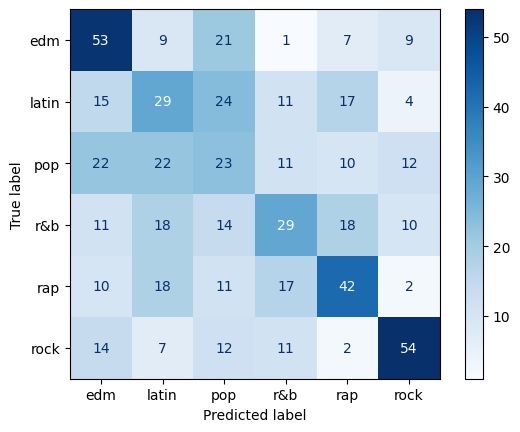

In [ ]:
#학습, 성능평가
model = RandomForestClassifier(n_estimators=10, random_state=2)
model.fit(X_train, y_train)


# Train set 성능
y_pred = model.predict(X_train)
acc = accuracy_score( y_train,y_pred) #정확도
recall = recall_score(y_train,y_pred,average='macro') # 민감도
precision = precision_score(y_train,y_pred,average='macro') # 정밀도

print("Train set 성능")
print(f"정확도:{acc:0.2f}",f"민감도:{recall:0.2f}",f"정밀도:{precision:0.2f}", sep='  |  ')

# Test set 성능
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
recall = recall_score(y_test,y_pred,average='macro') # 민감도
precision = precision_score(y_test,y_pred,average='macro') # 정밀도

print("\n")
print("Test set 성능")
print(f"정확도:{acc:0.2f}",f"민감도:{recall:0.2f}",f"정밀도:{precision:0.2f}", sep='  |  ')
print("\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion_matrix 시각화
print("confusion matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues)

plt.show()



danceability        0.126499
speechiness         0.126044
tempo               0.114032
energy              0.107592
acousticness        0.105126
loudness            0.102524
valence             0.097365
instrumentalness    0.079868
liveness            0.072500
key                 0.052760
mode                0.015690
dtype: float64


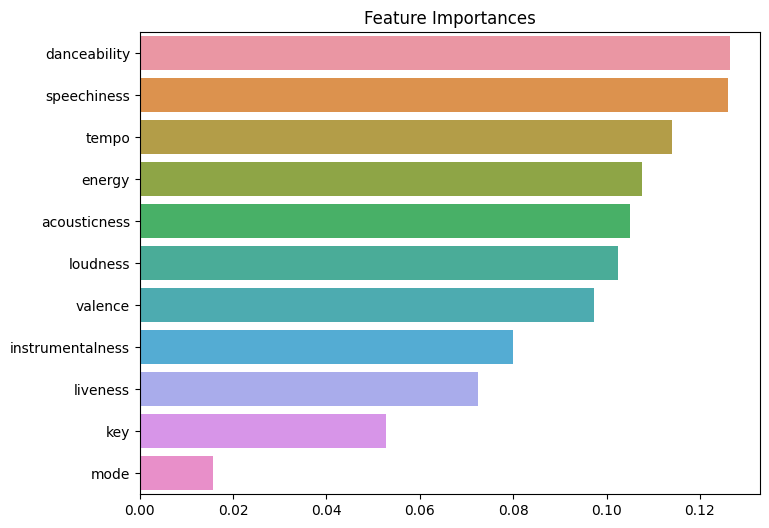

In [ ]:
# 시리즈로 만들어 인덱스를 붙인다
ser = pd.Series(model.feature_importances_, index=X.columns)

# 내림차순 정렬을 이용한다
top = ser.sort_values(ascending=False)[:]
print(top)
plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=top, y=top.index)
plt.show()

In [ ]:
##학습, 성능확인 - 교차 검증을 사용했을 경우(Train,Test 임의로 분리X)
model = RandomForestClassifier(n_estimators=10, random_state=2)


scores = cross_val_score(model, X,y) #5-겹 교차 검증 수행
print("교차 검증 점수:",scores)
print("교차 검증 평균 점수:{:.2f}".format(scores.mean())) #대략적인 정확도

교차 검증 점수: [0.42333333 0.395      0.41166667 0.45333333 0.40666667]
교차 검증 평균 점수:0.42


In [ ]:
rfc = RandomForestClassifier(random_state=2021)
param_grid = {
    'n_estimators': [50, 60, 70],
    'max_depth': [10,15,20],
    'max_leaf_nodes': [50, 100, 200],
    'criterion':['gini', 'entropy'],
    'max_features':['auto','sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=10, verbose=1 ,n_jobs=12)
CV_rfc.fit(X_train, y_train)

Fitting 10 folds for each of 162 candidates, totalling 1620 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=2021),
             n_jobs=12,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [50, 100, 200],
                         'n_estimators': [50, 60, 70]},
             verbose=1)